<a href="https://colab.research.google.com/github/Covic/P2ISLA_2023_G_AnDaVa/blob/main/ProjetoIIv3_1_regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importa as bibliotecas


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import requests
import io

In [ ]:
# Caminho para os arquivos CSV
url_cities = 'https://drive.google.com/file/d/1w4RTI9tqUBXFOawQUvhkpPZ0Ie6m1Zl3/view?usp=sharing '
url_sales = 'https://drive.google.com/file/d/1xVHv5Dbd2Ot5MJptWLd3FFzEmjI2UEat/view?usp=drive_link'
url_product = 'https://drive.google.com/file/d/1-xZWqrotDIYcAEK-2P3fKGU1fOTqxv3J/view?usp=drive_link'


In [ ]:
#Le url do drive
#csv cities
file_id_cities = '1w4RTI9tqUBXFOawQUvhkpPZ0Ie6m1Zl3'
url_cities = f'https://drive.google.com/uc?id={file_id_cities}'
cities = pd.read_csv(url_cities)

#csv product
file_id_product = '1wQSI6rSeapiPrPn4tQkJUsmMABptTiIn'
url_product = f'https://drive.google.com/uc?id={file_id_product}'
product = pd.read_csv(url_product)

In [ ]:
# Exibindo o header do dataframe cities
print(cities.head())

  store_id storetype_id  store_size city_id_old country_id city_code
0    S0036         ST04          21        C001     TURKEY   Denizli
1    S0005         ST04          19        C001     TURKEY   Denizli
2    S0104         ST04          47        C002     TURKEY    Ankara
3    S0068         ST03          14        C003     TURKEY     ?zmir
4    S0086         ST03          12        C003     TURKEY     ?zmir


In [ ]:
# Exibindo o header do dataframe product
print(product.head())

  product_id  product_length  product_depth  product_width cluster_id  \
0      P0000             5.0           20.0           12.0        NaN   
1      P0001            13.5           22.0           20.0  cluster_5   
2      P0002            22.0           40.0           22.0  cluster_0   
3      P0004             2.0           13.0            4.0  cluster_3   
4      P0005            16.0           30.0           16.0  cluster_9   

  hierarchy1_id hierarchy2_id hierarchy3_id hierarchy4_id hierarchy5_id  
0           H00         H0004       H000401     H00040105   H0004010534  
1           H01         H0105       H010501     H01050100   H0105010006  
2           H03         H0315       H031508     H03150800   H0315080028  
3           H03         H0314       H031405     H03140500   H0314050003  
4           H03         H0312       H031211     H03121109   H0312110917  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#csv sales
caminho_arquivo = '/content/drive/MyDrive/P2source/sales.csv'
sales = pd.read_csv(caminho_arquivo)

<ipython-input-7-3c5fd281a9ac>:3: DtypeWarning: Columns (11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  sales = pd.read_csv(caminho_arquivo)


In [ ]:
# Exibindo o conteudo do dataframe cities N=63
cities

,store_id,storetype_id,store_size,city_id_old,country_id,city_code
0,S0036,ST04,21,C001,TURKEY,Denizli
1,S0005,ST04,19,C001,TURKEY,Denizli
2,S0104,ST04,47,C002,TURKEY,Ankara
3,S0068,ST03,14,C003,TURKEY,?zmir
4,S0086,ST03,12,C003,TURKEY,?zmir
...,...,...,...,...,...,...
58,S0040,ST04,42,C017,TURKEY,Kahramanmaras
59,S0046,ST04,26,C017,TURKEY,Kahramanmaras
60,S0102,ST04,27,C018,TURKEY,Erzurum
61,S0032,ST03,14,C019,TURKEY,Van


In [ ]:
# Exibindo o conteúdo do dataframe product N=699
product

,product_id,product_length,product_depth,product_width,cluster_id,hierarchy1_id,hierarchy2_id,hierarchy3_id,hierarchy4_id,hierarchy5_id
0,P0000,5.0,20.0,12.0,NaN,H00,H0004,H000401,H00040105,H0004010534
1,P0001,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
2,P0002,22.0,40.0,22.0,cluster_0,H03,H0315,H031508,H03150800,H0315080028
3,P0004,2.0,13.0,4.0,cluster_3,H03,H0314,H031405,H03140500,H0314050003
4,P0005,16.0,30.0,16.0,cluster_9,H03,H0312,H031211,H03121109,H0312110917
...,...,...,...,...,...,...,...,...,...,...
694,P0744,2.0,7.0,7.0,NaN,H03,H0311,H031108,H03110802,H0311080202
695,P0745,NaN,NaN,NaN,cluster_0,H02,H0209,H020908,H02090804,H0209080422
696,P0746,1.0,1.0,1.0,cluster_0,H03,H0314,H031407,H03140702,H0314070202
697,P0747,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026


In [ ]:
# Exibindo o conteúdo do dataframe sales, N=8886058
sales

,Unnamed: 0,store_id,product_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
0,1,S0002,P0001,2017-01-02,0.0,0.00,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
1,2,S0002,P0005,2017-01-02,0.0,0.00,11.0,33.90,PR14,NaN,PR03,NaN,NaN,NaN
2,3,S0002,P0011,2017-01-02,0.0,0.00,9.0,49.90,PR14,NaN,PR03,NaN,NaN,NaN
3,4,S0002,P0015,2017-01-02,1.0,2.41,19.0,2.60,PR14,NaN,PR03,NaN,NaN,NaN
4,5,S0002,P0017,2017-01-02,0.0,0.00,12.0,1.49,PR14,NaN,PR03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8886053,8886054,S0143,P0676,2019-10-31,NaN,NaN,NaN,19.90,PR03,verylow,PR03,NaN,NaN,NaN
8886054,8886055,S0143,P0680,2019-10-31,NaN,NaN,NaN,139.90,PR14,NaN,PR03,NaN,NaN,NaN
8886055,8886056,S0143,P0694,2019-10-31,NaN,NaN,NaN,7.50,PR14,NaN,PR03,NaN,NaN,NaN
8886056,8886057,S0143,P0718,2019-10-31,NaN,NaN,NaN,23.75,PR14,NaN,PR03,NaN,NaN,NaN


In [ ]:
#Juntando os dataframes (poderia ser materialziado numa master de tempos em tempos caso o projeto fosse continuado pelo cliente)
df = pd.merge(sales, cities, on='store_id', how='inner')
df = pd.merge(sales, product, on='product_id', how='inner')

In [ ]:
# Configurar o Pandas para mostrar todas as colunas
pd.options.display.max_columns = None
df

,Unnamed: 0,store_id,product_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2,product_length,product_depth,product_width,cluster_id,hierarchy1_id,hierarchy2_id,hierarchy3_id,hierarchy4_id,hierarchy5_id
0,1,S0002,P0001,2017-01-02,0.0,0.0,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
1,184,S0002,P0001,2017-01-03,0.0,0.0,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
2,365,S0002,P0001,2017-01-04,0.0,0.0,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
3,545,S0002,P0001,2017-01-05,0.0,0.0,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
4,725,S0002,P0001,2017-01-06,0.0,0.0,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8886053,8828515,S0104,P0396,2019-10-27,NaN,NaN,NaN,7.90,PR14,NaN,PR03,NaN,NaN,NaN,3.0,7.0,3.0,cluster_0,H01,H0108,H010806,H01080616,H0108061601
8886054,8828818,S0104,P0396,2019-10-28,NaN,NaN,NaN,7.90,PR14,NaN,PR03,NaN,NaN,NaN,3.0,7.0,3.0,cluster_0,H01,H0108,H010806,H01080616,H0108061601
8886055,8829119,S0104,P0396,2019-10-29,NaN,NaN,NaN,7.90,PR14,NaN,PR03,NaN,NaN,NaN,3.0,7.0,3.0,cluster_0,H01,H0108,H010806,H01080616,H0108061601
8886056,8829418,S0104,P0396,2019-10-30,NaN,NaN,NaN,7.90,PR14,NaN,PR03,NaN,NaN,NaN,3.0,7.0,3.0,cluster_0,H01,H0108,H010806,H01080616,H0108061601


In [ ]:
# Ainda sem tratamento de dados, as descritivas do dataframe bruto apenas para as variáveis que representam quantidades, a "unnamed" é apenas o ID serial da tabela sales

df.describe()

,Unnamed: 0,sales,revenue,stock,price,promo_discount_2,product_length,product_depth,product_width
count,8.886058e+06,8.583762e+06,8.583762e+06,8.583762e+06,8.794677e+06,12721.000000,8.847242e+06,8.849405e+06,8.849405e+06
mean,4.443030e+06,4.734080e-01,2.285173e+00,1.600575e+01,1.575377e+01,30.110605,6.084294e+00,1.745542e+01,1.235898e+01
std,2.565184e+06,2.129059e+01,5.406806e+01,3.751692e+01,3.277869e+01,11.850900,5.866296e+00,1.003769e+01,7.717969e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,16.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.221515e+06,0.000000e+00,0.000000e+00,4.000000e+00,3.450000e+00,20.000000,2.200000e+00,1.130000e+01,7.500000e+00
50%,4.443030e+06,0.000000e+00,0.000000e+00,8.000000e+00,8.000000e+00,20.000000,5.000000e+00,1.700000e+01,1.020000e+01
75%,6.664544e+06,0.000000e+00,0.000000e+00,1.700000e+01,1.695000e+01,35.000000,7.300000e+00,2.300000e+01,1.500000e+01
max,8.886058e+06,4.330100e+04,8.419796e+04,4.655000e+03,1.599000e+03,50.000000,1.000000e+02,1.650000e+02,1.000000e+02


In [ ]:
# Vamos checar os valores declaradamente nulos no nosso dataframe bruto

na_counts = df.isna().sum()
print(na_counts)



Unnamed: 0                     0
store_id                       0
product_id                     0
date                           0
sales                     302296
revenue                   302296
stock                     302296
price                      91381
promo_type_1                   0
promo_bin_1              7653515
promo_type_2                   0
promo_bin_2              8873337
promo_discount_2         8873337
promo_discount_type_2    8873337
product_length             38816
product_depth              36653
product_width              36653
cluster_id                     0
hierarchy1_id                  0
hierarchy2_id                  0
hierarchy3_id                  0
hierarchy4_id                  0
hierarchy5_id                  0
dtype: int64


In [ ]:
# A princípio vamos eliminar as linhas nulas para revenue
# Isso ocorre para testar o modelo previsivo em termos de revenue para estes meses

df.dropna(subset=['revenue'], inplace=True)
na_counts = df.isna().sum()
print(na_counts)


Unnamed: 0                     0
store_id                       0
product_id                     0
date                           0
sales                          0
revenue                        0
stock                          0
price                      89409
promo_type_1                   0
promo_bin_1              7401743
promo_type_2                   0
promo_bin_2              8575279
promo_discount_2         8575279
promo_discount_type_2    8575279
product_length             37185
product_depth              35270
product_width              35270
cluster_id                     0
hierarchy1_id                  0
hierarchy2_id                  0
hierarchy3_id                  0
hierarchy4_id                  0
hierarchy5_id                  0
dtype: int64


In [ ]:
#inicializar as datas iniciais e finais...
data_inicial = pd.to_datetime(df["date"]).min()
data_final = pd.to_datetime(df["date"]).max()

In [ ]:
# Obter os store_ids únicos
unique_store_ids = df['store_id'].unique()
unique_store_ids

array(['S0002', 'S0010', 'S0012', 'S0015', 'S0020', 'S0023', 'S0026',
       'S0038', 'S0040', 'S0045', 'S0050', 'S0052', 'S0055', 'S0056',
       'S0058', 'S0061', 'S0062', 'S0067', 'S0072', 'S0073', 'S0083',
       'S0085', 'S0091', 'S0094', 'S0097', 'S0102', 'S0104', 'S0107',
       'S0108', 'S0122', 'S0126', 'S0131', 'S0132', 'S0142', 'S0095',
       'S0003', 'S0007', 'S0014', 'S0016', 'S0030', 'S0032', 'S0039',
       'S0059', 'S0068', 'S0071', 'S0076', 'S0077', 'S0080', 'S0086',
       'S0088', 'S0089', 'S0099', 'S0109', 'S0120', 'S0136', 'S0141',
       'S0143', 'S0005', 'S0022', 'S0036', 'S0046', 'S0092', 'S0041'],
      dtype=object)

In [ ]:
#Baseline

# Converter a coluna "date" em formato de data
df["date"] = pd.to_datetime(df["date"])

# Filtrar o DataFrame para obter apenas as colunas necessárias
df2 = df[["date", "revenue", "store_id"]]

# Criar uma lista para armazenar as previsões de cada loja
all_predictions = []


In [ ]:
#Agora vamos agrupar os dados po loja e dia, somando todos os valores de revenue num novo dataframe chamado df3
df3 = df2.groupby(['date', 'store_id']).agg({'revenue': 'sum'}).reset_index()

# Exibindo o novo DataFrame df3
print(df3)

            date store_id  revenue
0     2017-01-02    S0002   171.59
1     2017-01-02    S0003    67.47
2     2017-01-02    S0010   364.99
3     2017-01-02    S0012    68.52
4     2017-01-02    S0014   216.67
...          ...      ...      ...
57646 2019-09-30    S0131   152.57
57647 2019-09-30    S0132   418.49
57648 2019-09-30    S0141    36.25
57649 2019-09-30    S0142   301.93
57650 2019-09-30    S0143    80.82

[57651 rows x 3 columns]


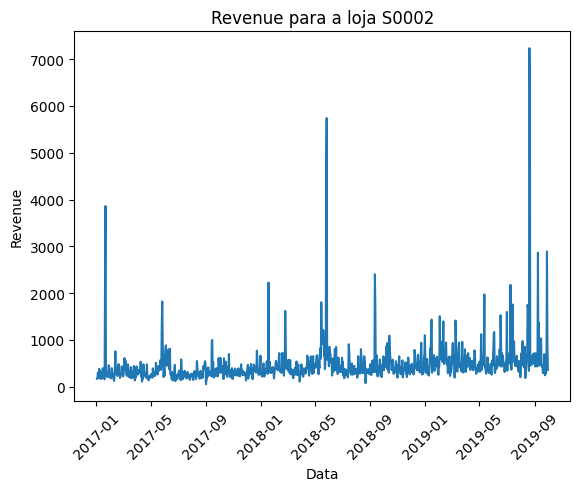

In [ ]:
#Vamos tentar desenhar um gráfico de todos os dias para a loja S0002
# Filtrando o DataFrame para a loja 'S0002'
loja_s0002 = df3[df3['store_id'] == 'S0002']

# Configurando o gráfico
plt.plot(loja_s0002['date'], loja_s0002['revenue'])
plt.xlabel('Data')
plt.ylabel('Revenue')
plt.title('Revenue para a loja S0002')
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.show()

In [ ]:
#Vamos importar o sklearn para fazer as regressões
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
# Filtrando o DataFrame para a loja 'S0002'
loja_s0002 = df3[df3['store_id'] == 'S0002'].copy()

# Convertendo a coluna de data para valores numéricos, como teste apenas, depois vamos tratar de usar a data em dias mesmo
loja_s0002['date'] = pd.to_datetime(loja_s0002['date']).dt.strftime('%Y%m%d').astype(int)

# Separando as variáveis independentes (X) e dependentes (y)
X = loja_s0002[['date']]
y = loja_s0002['revenue']

# Criando o objeto de regressão linear
regressor = LinearRegression()

# Ajustando o modelo aos dados
regressor.fit(X, y)

# Obtendo os parâmetros da regressão
intercept = regressor.intercept_
coef = regressor.coef_[0]

# Imprimindo os parâmetros da regressão
print('Parâmetros da Regressão Linear:')
print('Intercept:', intercept)
print('Coeficiente:', coef)

Parâmetros da Regressão Linear:
Intercept: -297249.08512655756
Coeficiente: 0.01475357258201665


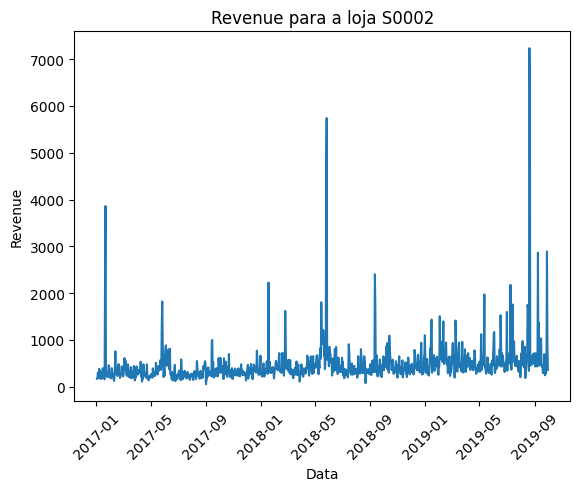

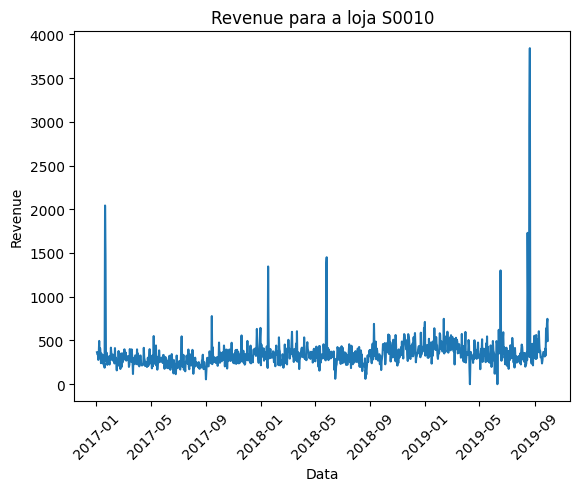

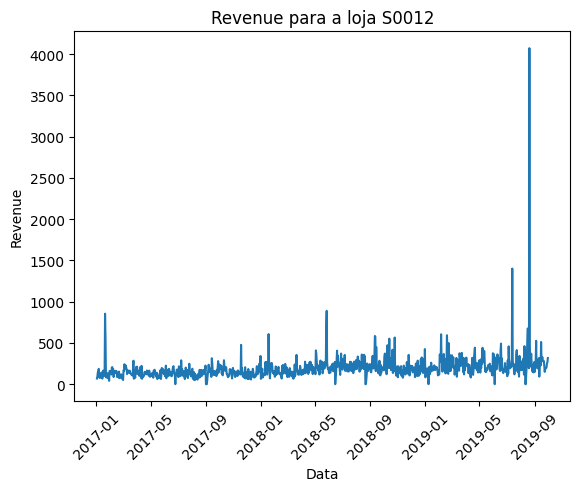

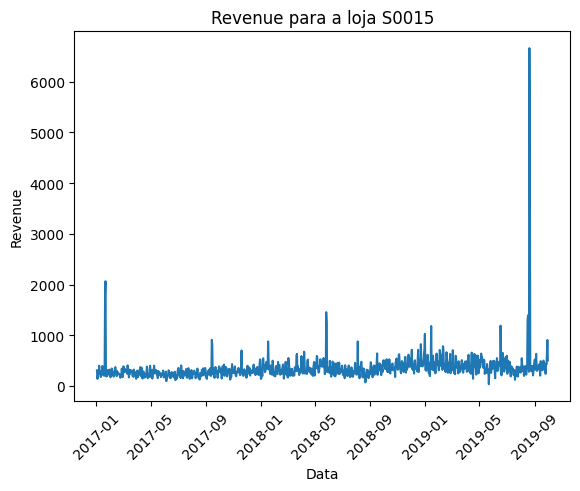

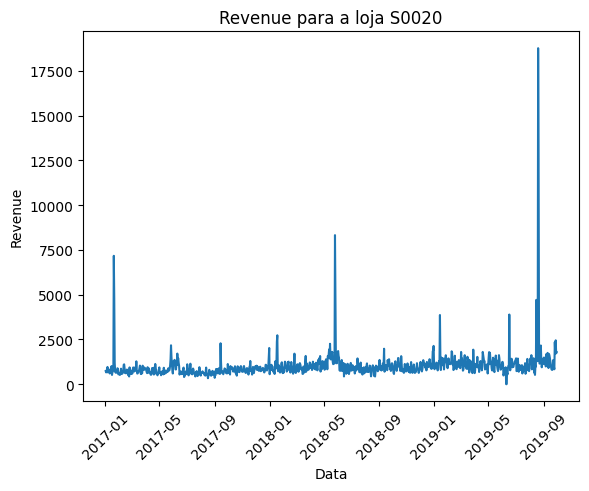

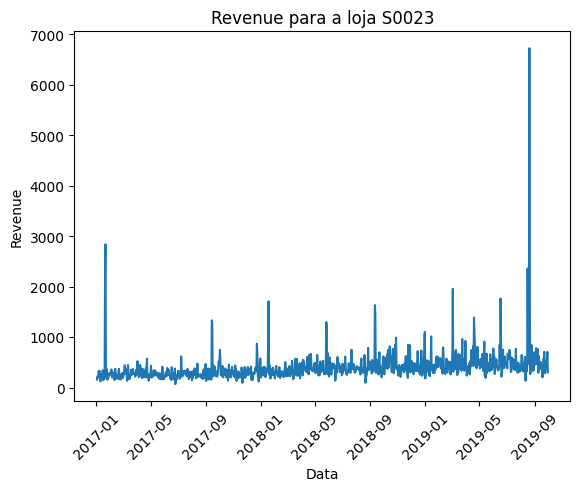

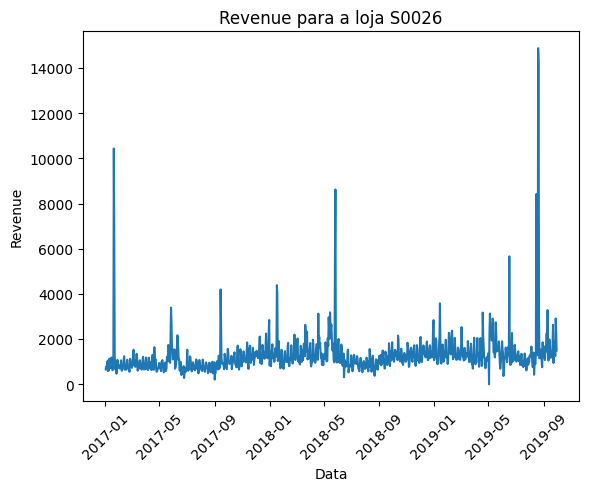

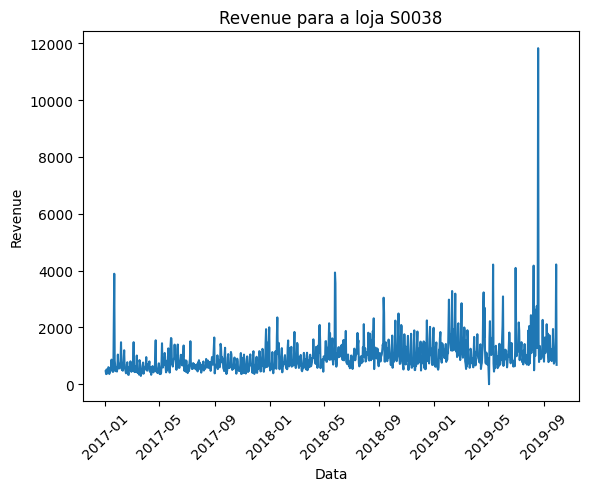

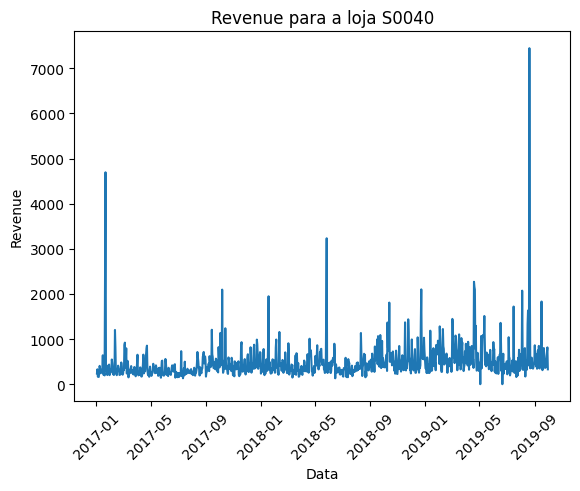

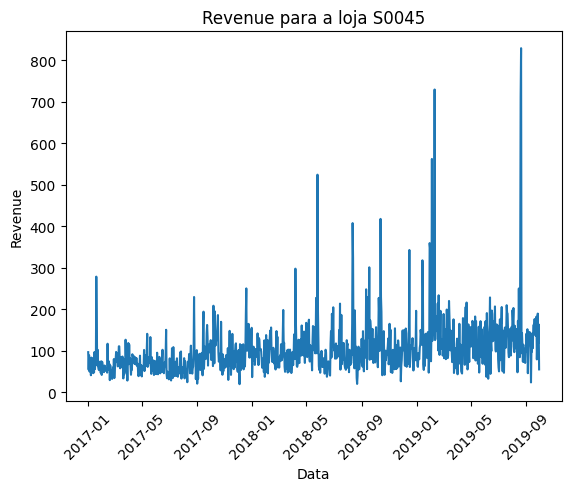

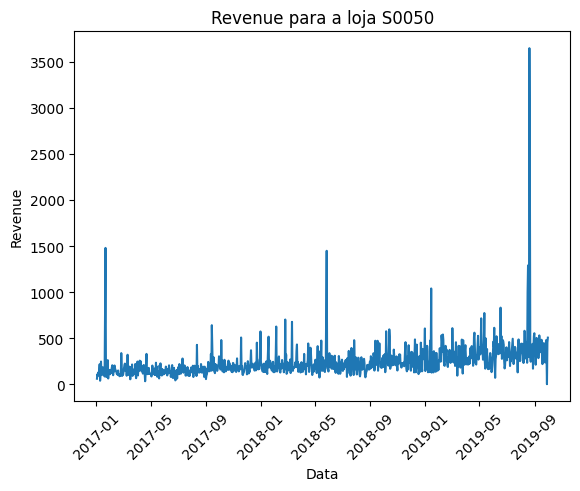

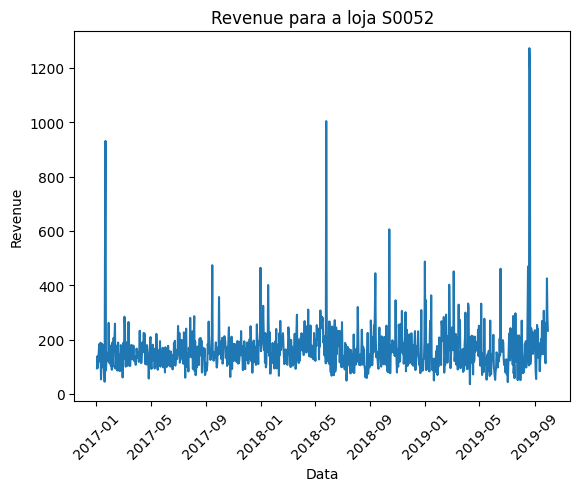

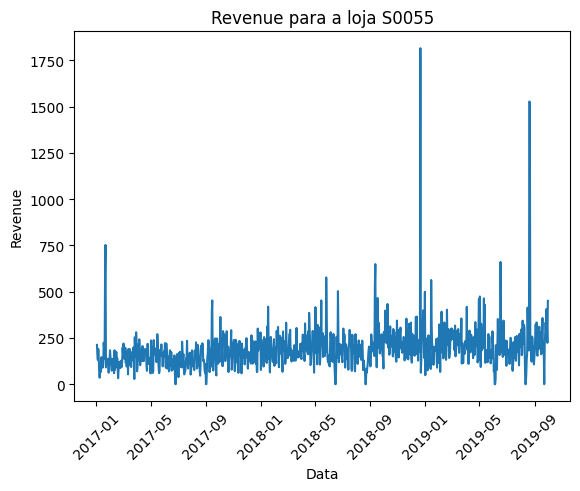

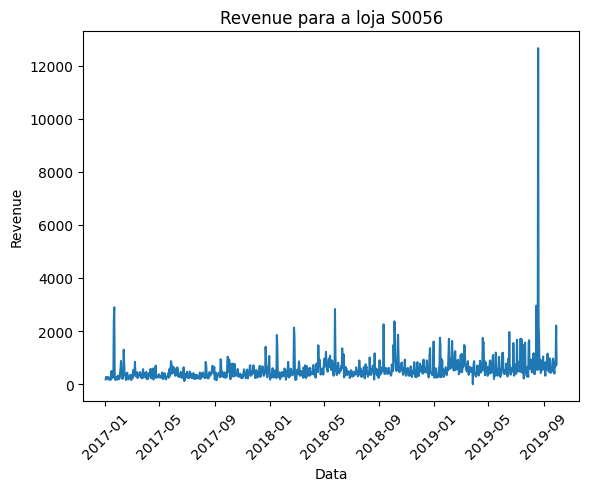

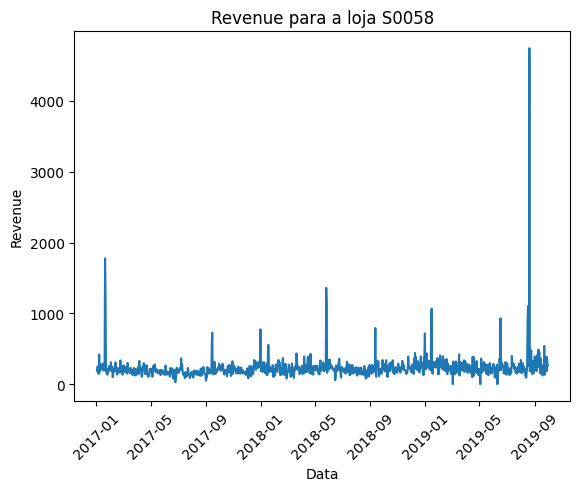

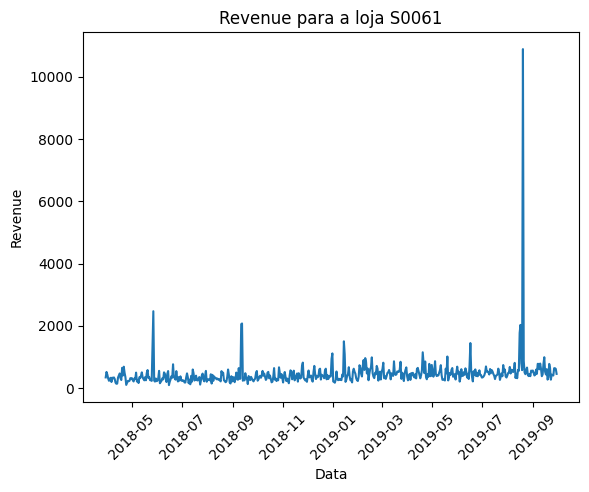

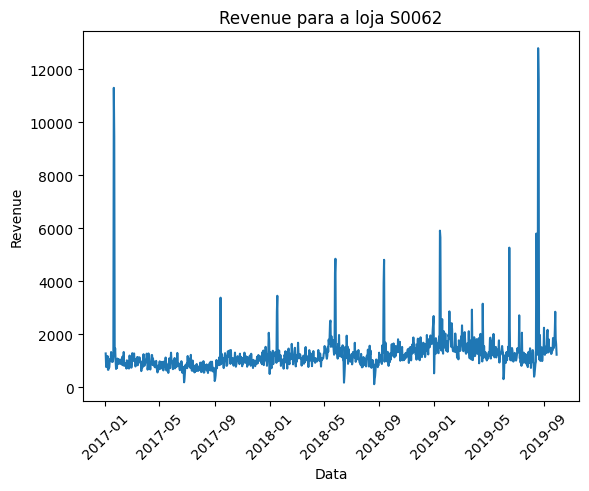

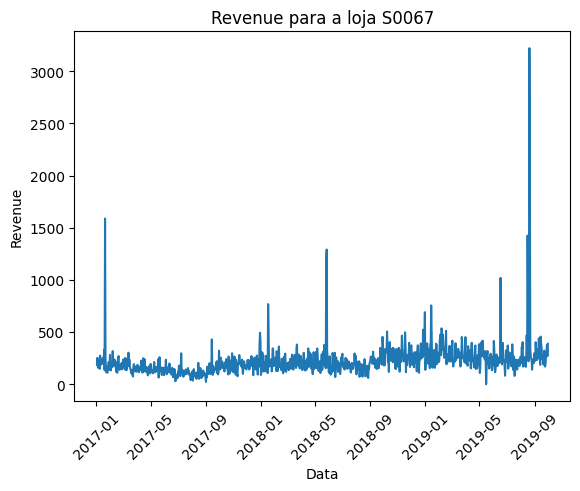

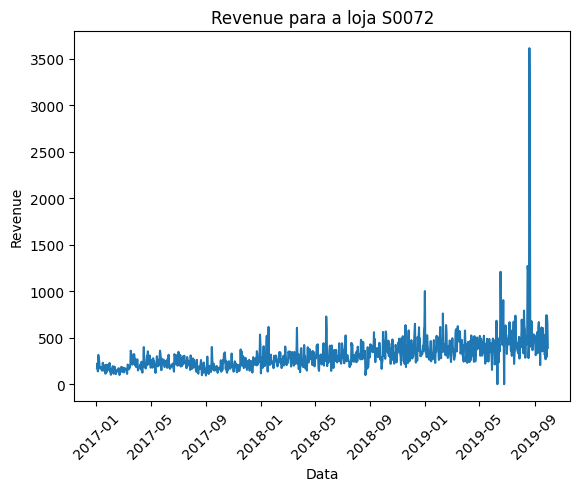

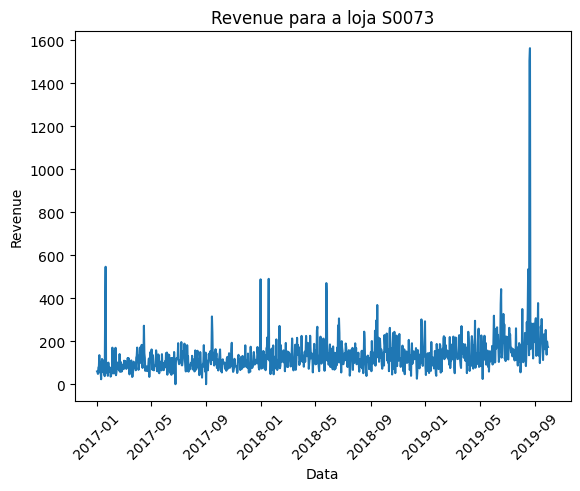

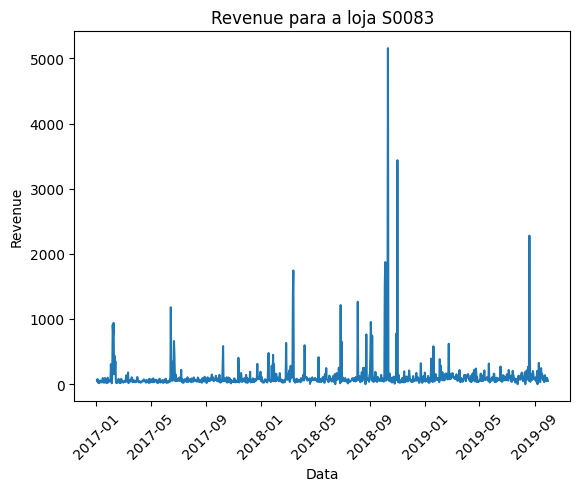

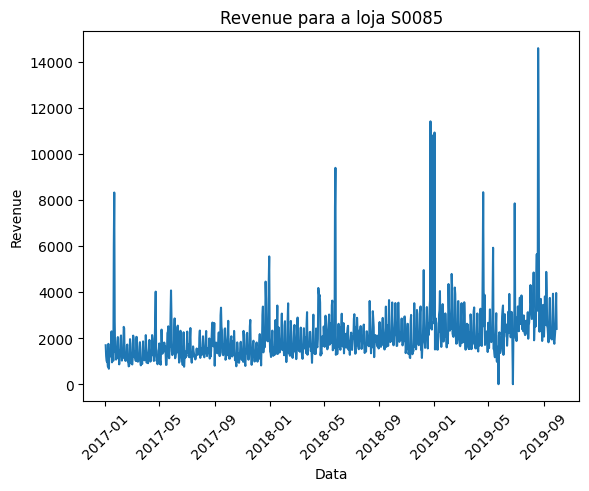

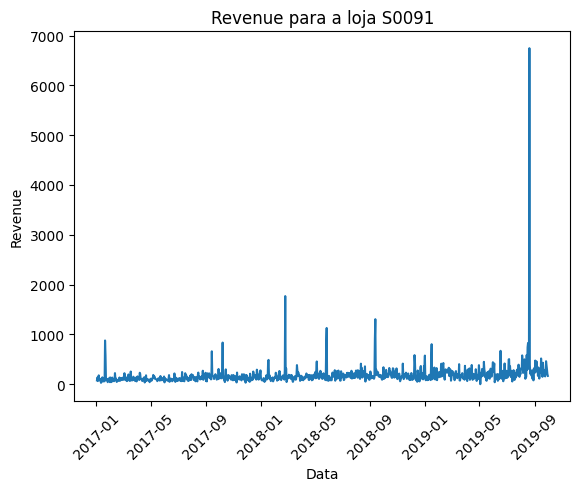

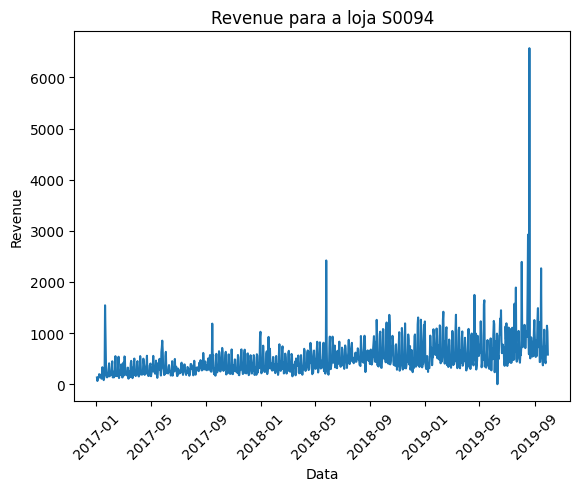

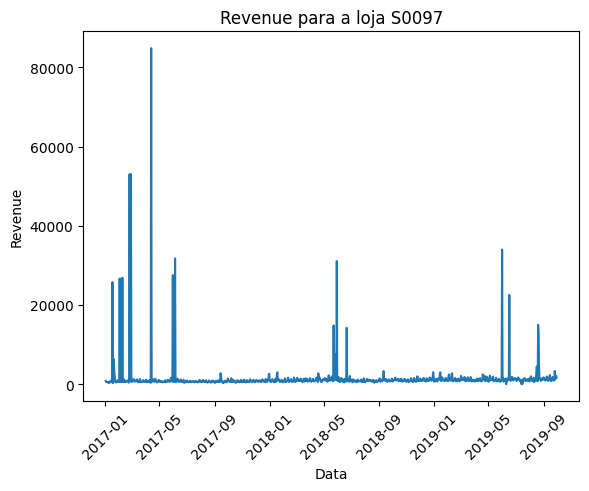

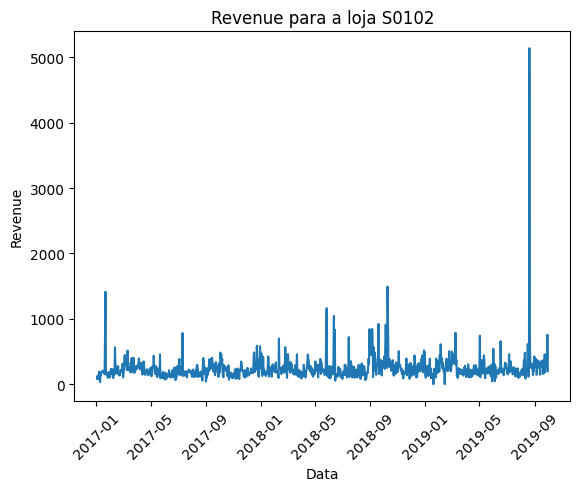

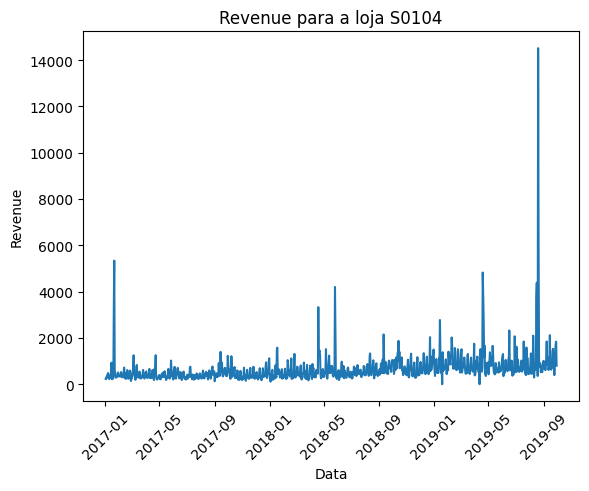

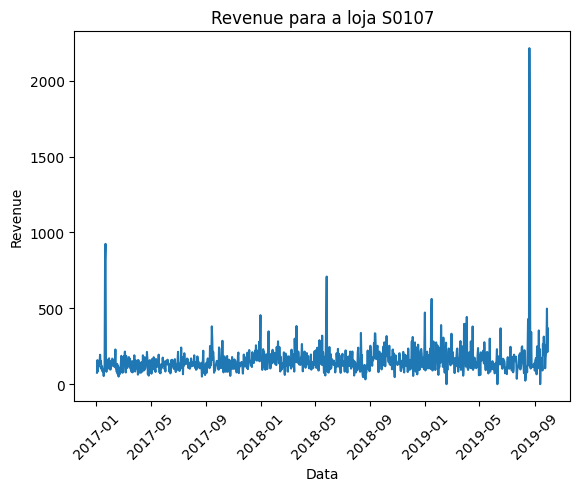

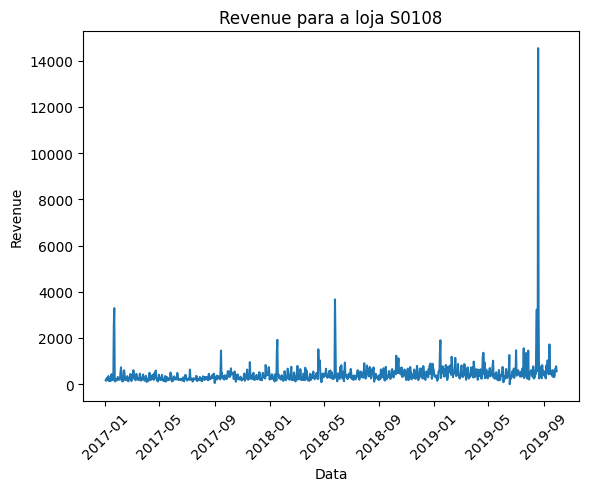

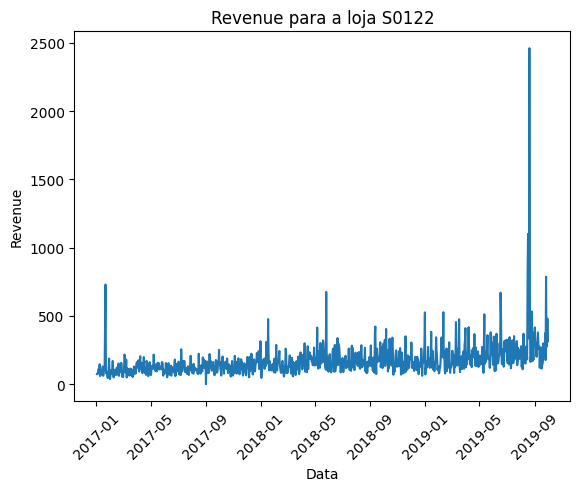

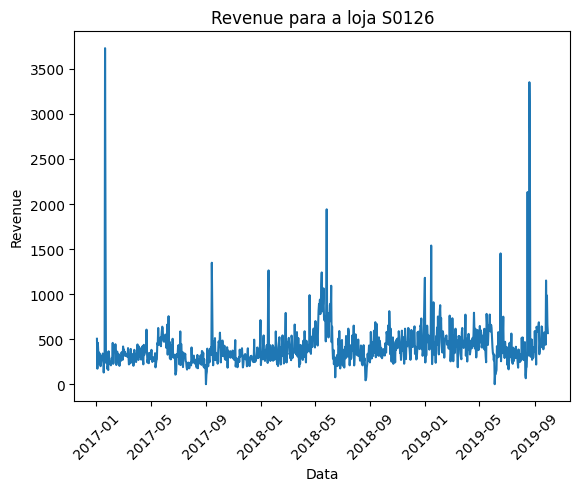

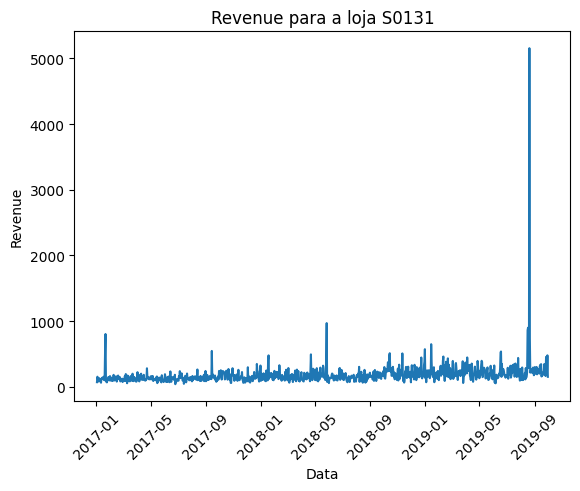

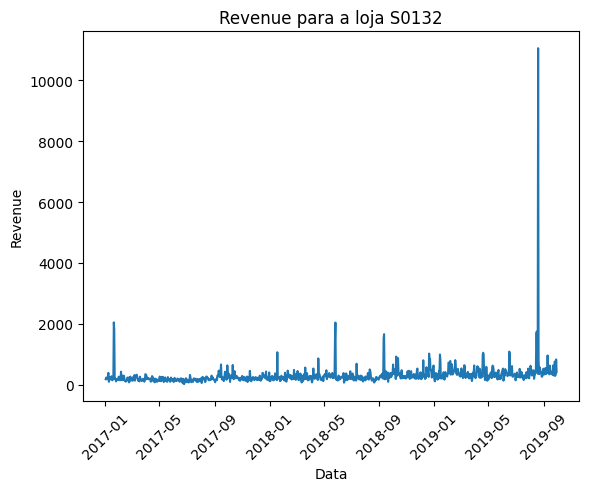

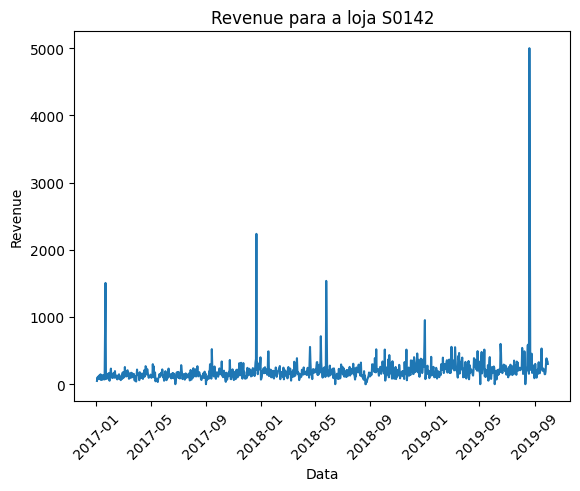

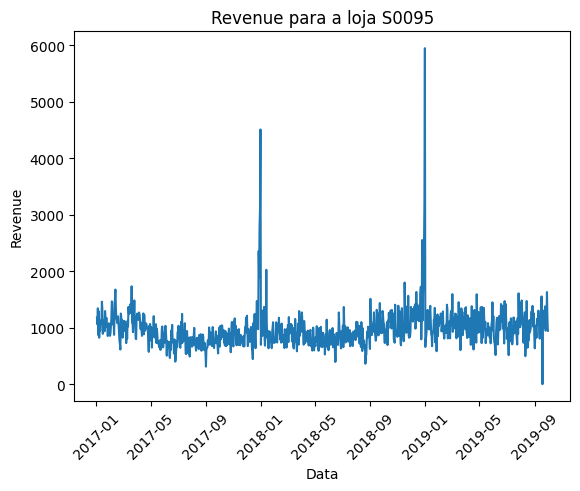

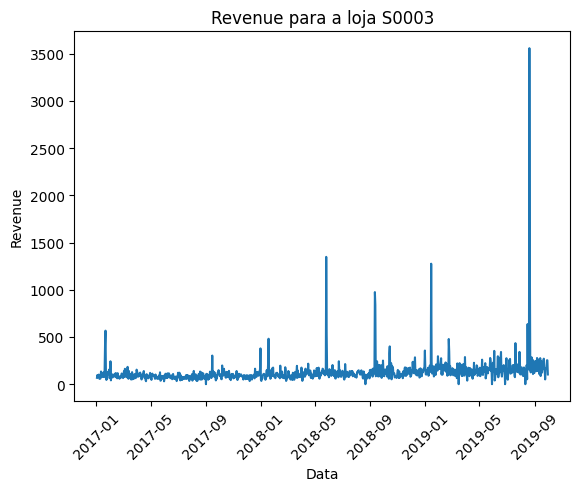

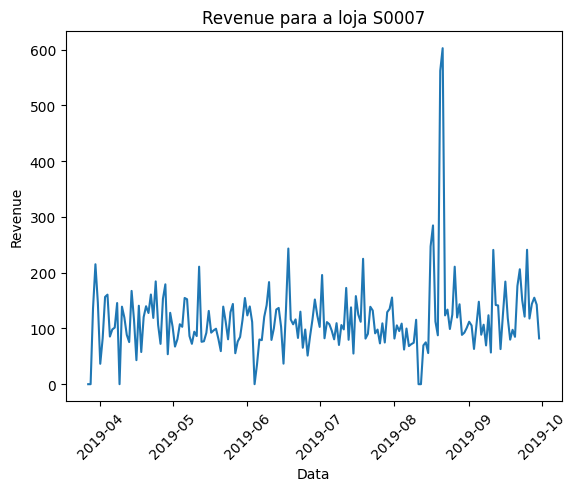

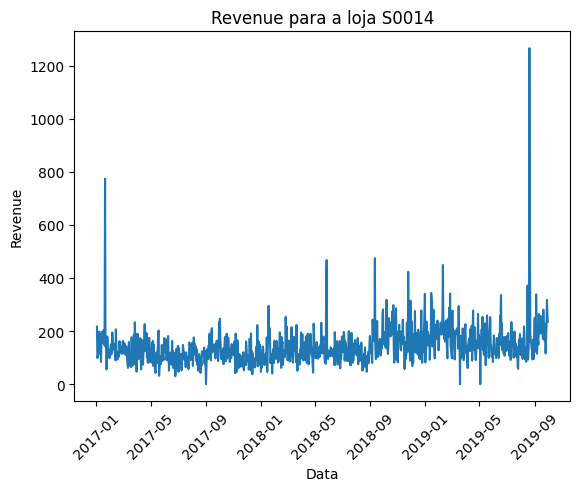

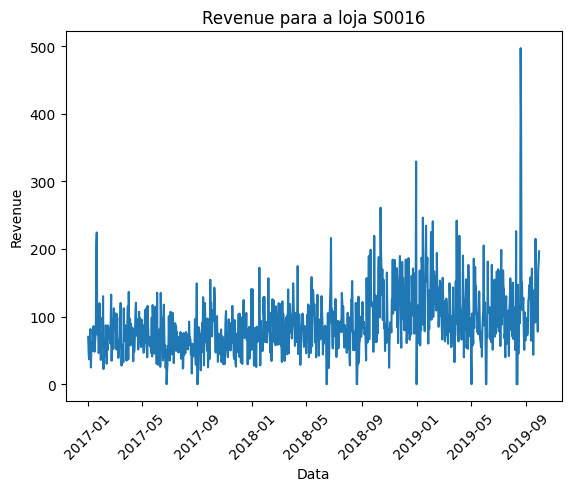

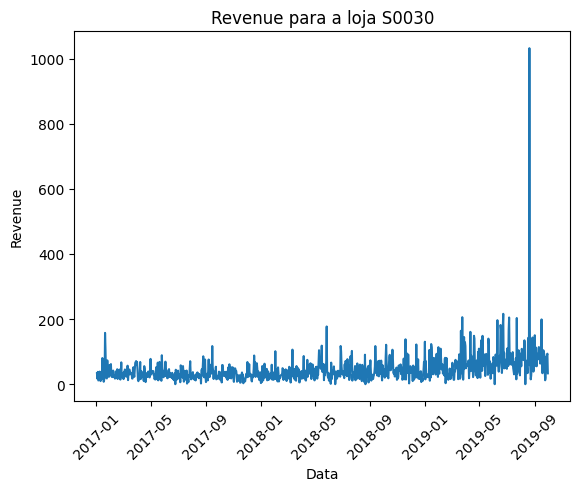

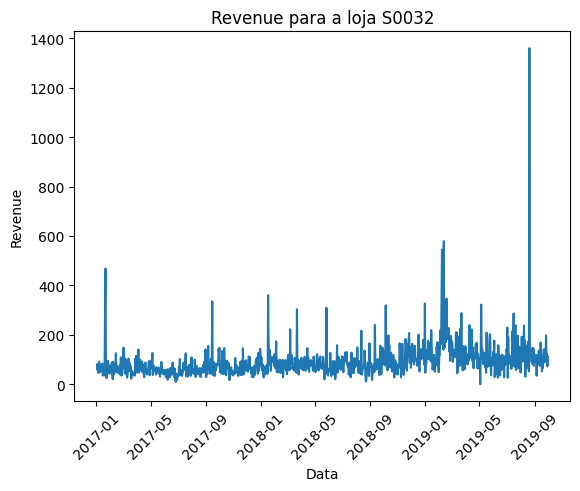

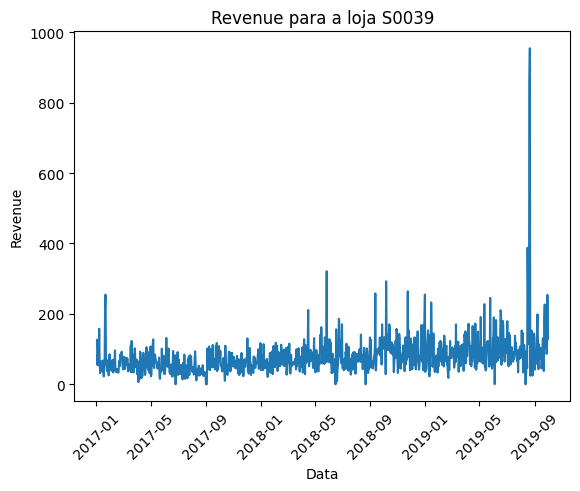

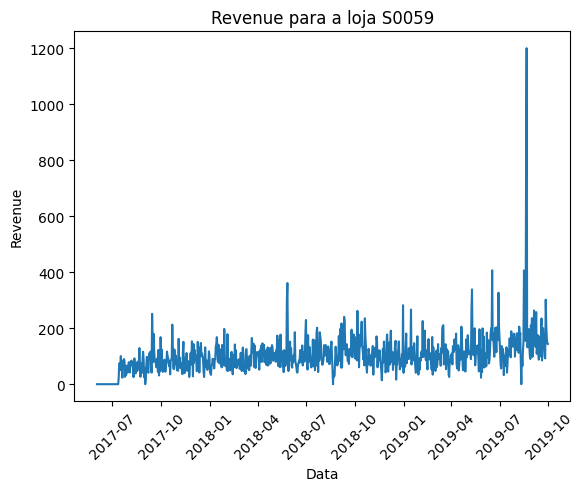

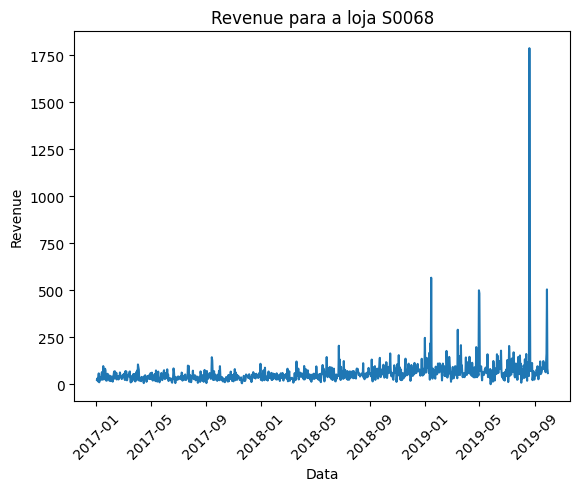

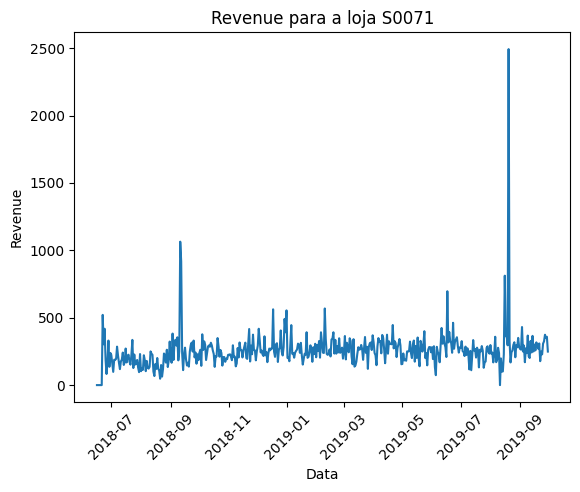

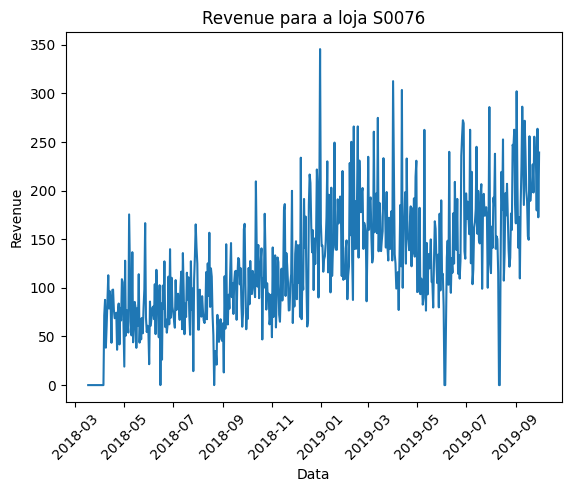

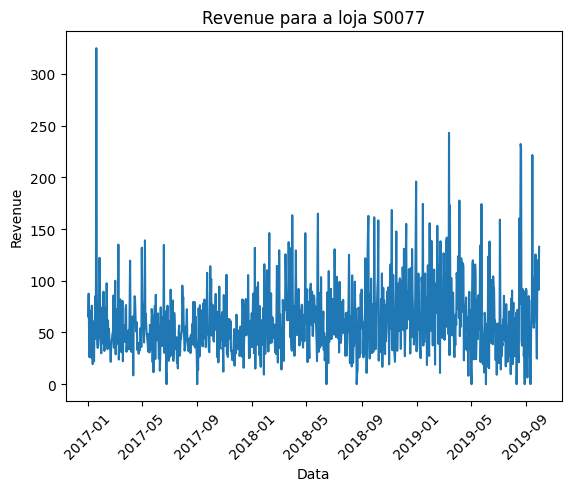

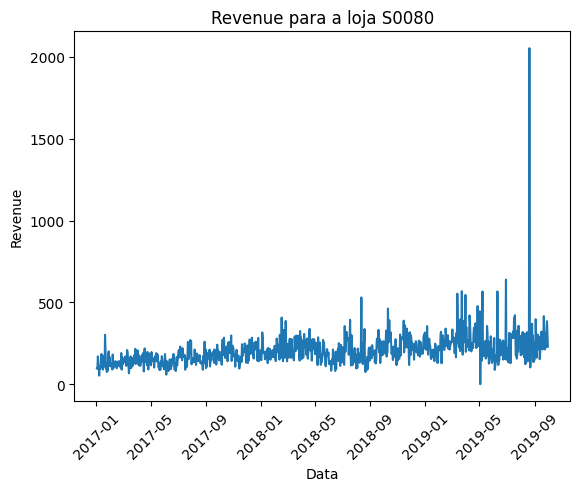

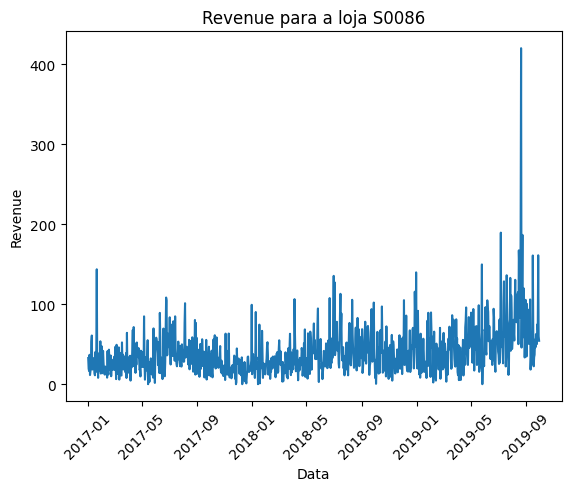

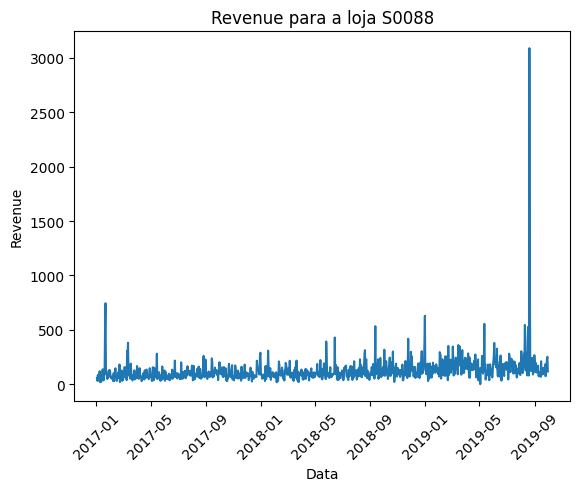

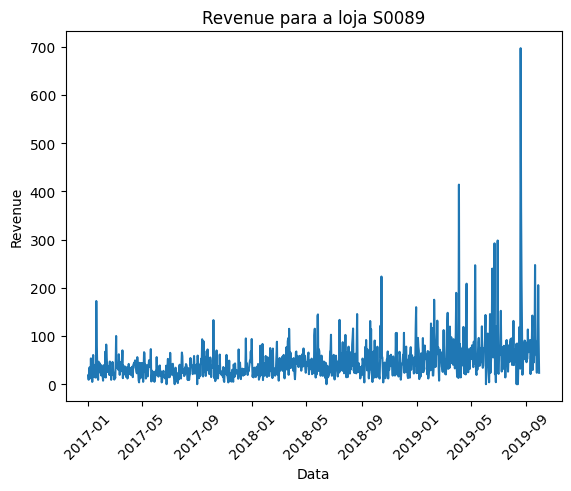

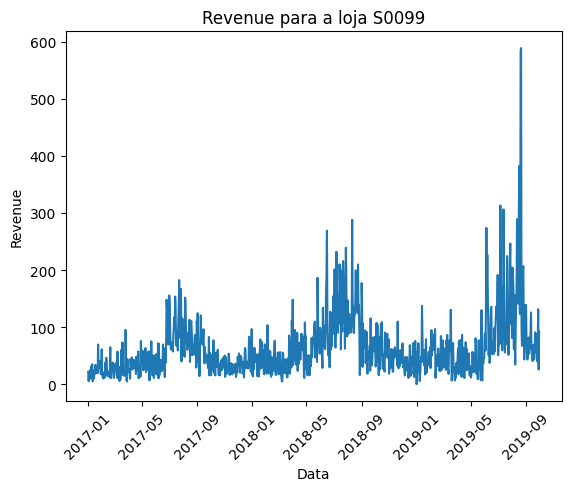

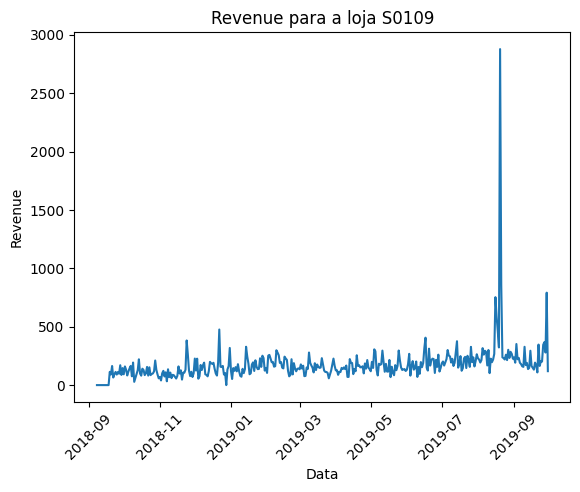

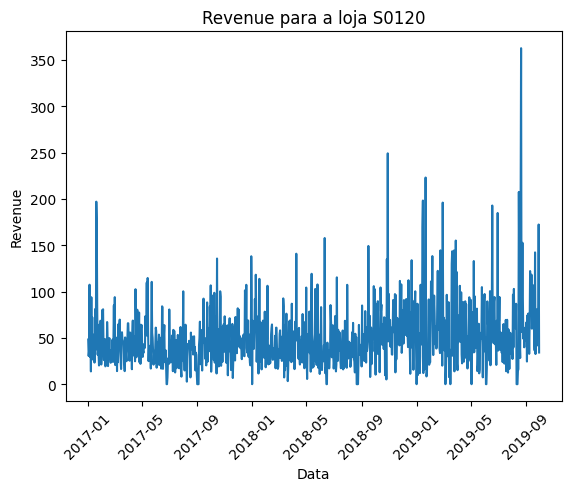

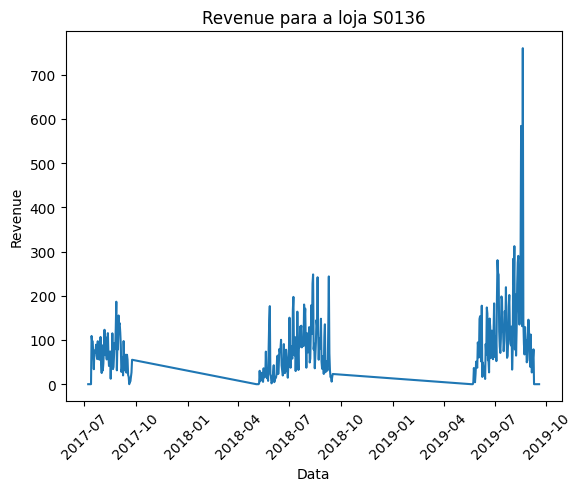

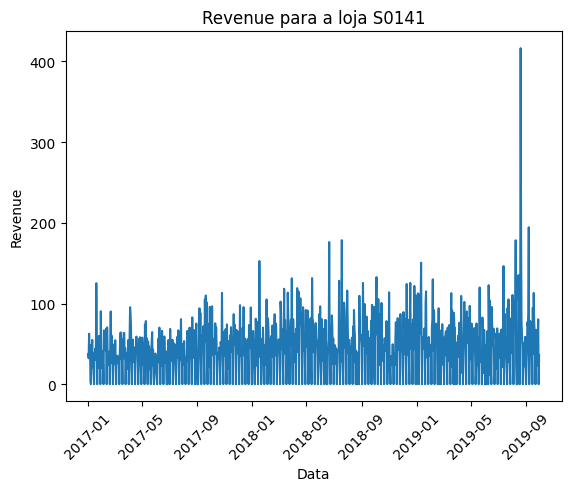

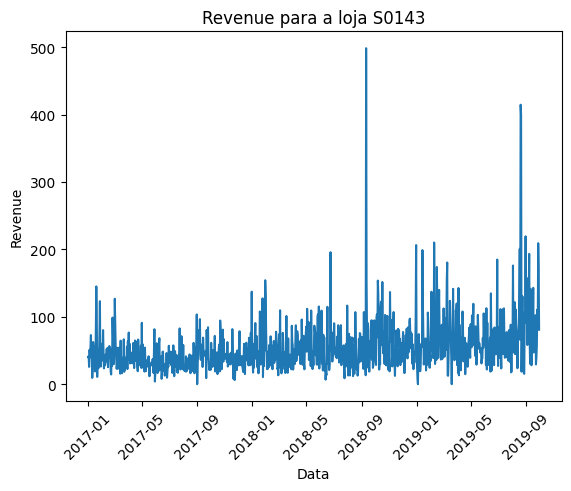

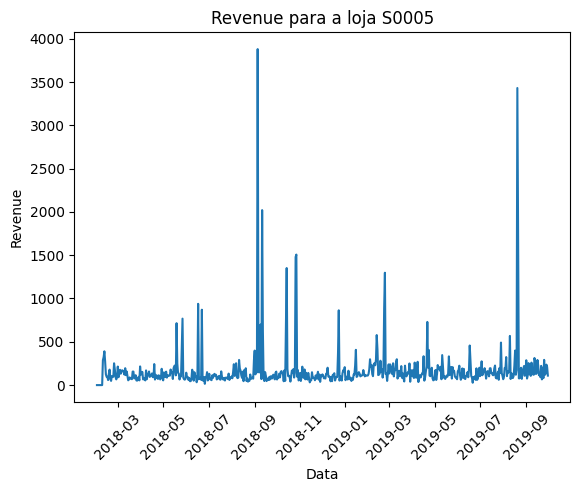

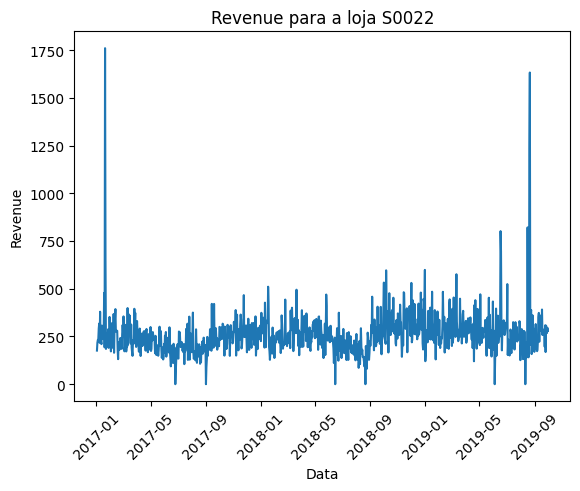

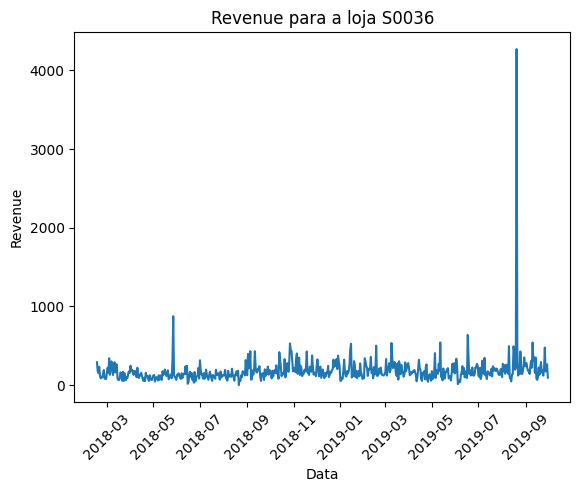

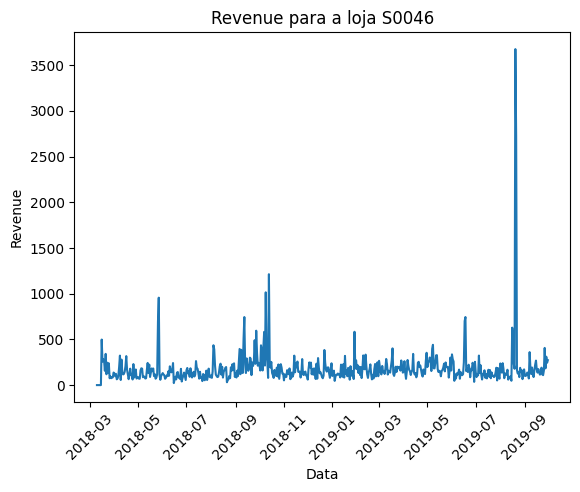

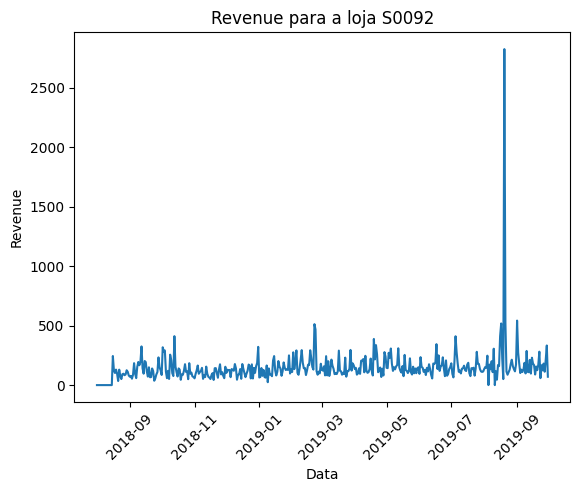

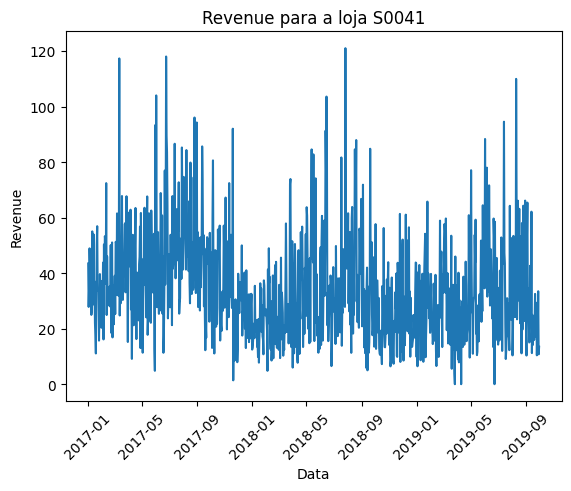

In [ ]:
#Agora vamos desenhar os revenues diários para todas as lojas num loop
# Loop pelos IDs de loja
for store_id in unique_store_ids:
    # Filtrando o DataFrame para a loja atual
    loja_atual = df3[df3['store_id'] == store_id]

    # Configurando o gráfico
    plt.plot(loja_atual['date'], loja_atual['revenue'])
    plt.xlabel('Data')
    plt.ylabel('Revenue')
    plt.title('Revenue para a loja {}'.format(store_id))
    plt.xticks(rotation=45)

    # Exibindo o gráfico
    plt.show()

In [ ]:
# E finalmente vamos agora usar nosso modelo regressivo para obter os parâmetros gerais de cada uma das lojas e observar se há similaridades entre os coeficientes

# Loop pelos IDs de loja
for store_id in unique_store_ids:
    # Filtrando o DataFrame para a loja atual
    loja_atual = df3[df3['store_id'] == store_id].copy()

    # Convertendo a coluna de data para valores numéricos (dias inteiros)
    loja_atual['date'] = (loja_atual['date'] - loja_atual['date'].min()).dt.days

    # Separando as variáveis independentes (X) e dependentes (y)
    X = loja_atual[['date']]
    y = loja_atual['revenue']

    # Criando o objeto de regressão linear
    regressor = LinearRegression()

    # Ajustando o modelo aos dados
    regressor.fit(X, y)

    # Obtendo os parâmetros da regressão
    intercept = regressor.intercept_
    coef = regressor.coef_[0]

    # Imprimindo os parâmetros da regressão para a loja atual
    print('Parâmetros da Regressão Linear para a loja', store_id)
    print('Intercept:', intercept)
    print('Coeficiente:', coef)
    print('-' * 30)



Parâmetros da Regressão Linear para a loja S0002
Intercept: 277.0326731979709
Coeficiente: 0.3932872146927586
------------------------------
Parâmetros da Regressão Linear para a loja S0010
Intercept: 268.19714047478317
Coeficiente: 0.15700041524197805
------------------------------
Parâmetros da Regressão Linear para a loja S0012
Intercept: 112.07854970020074
Coeficiente: 0.16120700297785814
------------------------------
Parâmetros da Regressão Linear para a loja S0015
Intercept: 230.03952376403726
Coeficiente: 0.2422286639277583
------------------------------
Parâmetros da Regressão Linear para a loja S0020
Intercept: 699.2516565871247
Coeficiente: 0.6132701232892876
------------------------------
Parâmetros da Regressão Linear para a loja S0023
Intercept: 235.30718962871865
Coeficiente: 0.3241147395359609
------------------------------
Parâmetros da Regressão Linear para a loja S0026
Intercept: 911.7573776872971
Coeficiente: 0.7016835610643412
------------------------------
Parâmet

In [ ]:
# De fato parece que os coeficientes quase todos estão numa mesma ordem de grandeza similar ao revenue, o que é um bom sinal para o período, vamos apenas multiplicar os coeficientes por 365,25 e obter o coeficiente anual

# Criação do DataFrame pivot_anual
pivot_anual = pd.DataFrame(columns=['store_id', 'coeficiente_anual'])

# Loop pelos IDs de loja
for store_id in unique_store_ids:
    # Filtrando o DataFrame para a loja atual
    loja_atual = df3[df3['store_id'] == store_id].copy()

    # Convertendo a coluna de data para valores numéricos (dias inteiros)
    loja_atual['date'] = (loja_atual['date'] - loja_atual['date'].min()).dt.days

    # Separando as variáveis independentes (X) e dependentes (y)
    X = loja_atual[['date']]
    y = loja_atual['revenue']

    # Criando o objeto de regressão linear
    regressor = LinearRegression()

    # Ajustando o modelo aos dados
    regressor.fit(X, y)

    # Obtendo o coeficiente diário
    coeficiente_diario = regressor.coef_[0]

    # Obtendo o coeficiente anual
    coeficiente_anual = coeficiente_diario * 365.25

    # Imprimindo os parâmetros da regressão para a loja atual
    print('Parâmetros da Regressão Linear para a loja', store_id)
    print('Intercept:', regressor.intercept_)
    print('Coeficiente Diário:', coeficiente_diario)
    print('Coeficiente Anual:', coeficiente_anual)
    print('-' * 30)

    # Adicionando a linha ao DataFrame pivot_anual
    pivot_anual = pd.concat([pivot_anual, pd.DataFrame({'store_id': [store_id], 'coeficiente_anual': [coeficiente_anual]})], ignore_index=True)

Parâmetros da Regressão Linear para a loja S0002
Intercept: 277.0326731979709
Coeficiente Diário: 0.3932872146927586
Coeficiente Anual: 143.64815516653007
------------------------------
Parâmetros da Regressão Linear para a loja S0010
Intercept: 268.19714047478317
Coeficiente Diário: 0.15700041524197805
Coeficiente Anual: 57.34440166713248
------------------------------
Parâmetros da Regressão Linear para a loja S0012
Intercept: 112.07854970020074
Coeficiente Diário: 0.16120700297785814
Coeficiente Anual: 58.88085783766269
------------------------------
Parâmetros da Regressão Linear para a loja S0015
Intercept: 230.03952376403726
Coeficiente Diário: 0.2422286639277583
Coeficiente Anual: 88.47401949961372
------------------------------
Parâmetros da Regressão Linear para a loja S0020
Intercept: 699.2516565871247
Coeficiente Diário: 0.6132701232892876
Coeficiente Anual: 223.9969125314123
------------------------------
Parâmetros da Regressão Linear para a loja S0023
Intercept: 235.30718

In [ ]:
#Há algumas lojas com menos de 1 ano de dados, e pode ocorrer nesses casos de coeficientes negativos ou um tanto estranhos, vamos obter um coeficiente geral e guardar ele
media_coeficientes = pivot_regressao['coeficiente_anual'].mean()

print("Média dos Coeficientes: ", media_coeficientes)

#Muitos comentários sobre esse m+etodo, estamos inferindo que cada loja conta como uma observação da realidade com o mesmo peso, logo a mega store tem a mesma validade que a mini lojinha, em todo caso, o parâmetro vai ser usado apenas em casos com poucos dados para obter uma inclinação marginal quando os dados de uma determinada loja forem mesmo muito fracos.


Média dos Coeficientes:  9.641341431106752e-13


In [ ]:
#IGNORAR ESSE BLOCO DE SANDBOX
#Estou encontrando coeficiente muito altos em alguns casos, vamos checar para loja 2 o que ocorre, essa parte se refere a um teste anterior e vou manter aqui para testes apenas...

# Filtrando o DataFrame para a loja S0002
loja_s0002 = df[df['store_id'] == 'S0002'].copy()

# Convertendo a coluna de data para o tipo de dados datetime
loja_s0002['date'] = pd.to_datetime(loja_s0002['date'], format='%Y-%m-%d')

# Definindo a coluna de data como o índice do DataFrame
loja_s0002.set_index('date', inplace=True)

# Selecionando apenas a coluna 'revenue'
loja_s0002_revenue = loja_s0002['revenue']

# Agrupando os valores em blocos de 100 dias e calculando a soma de revenue
blocos_revenue = loja_s0002_revenue.resample('100D').sum()

# Imprimindo os valores de cada bloco
print(blocos_revenue)


date
2017-01-02    35476.85
2017-04-12    35633.75
2017-07-21    32845.97
2017-10-29    36388.45
2018-02-06    44587.76
2018-05-17    56634.82
2018-08-25    45325.61
2018-12-03    55631.79
2019-03-13    53427.67
2019-06-21    77545.44
2019-09-29     1322.56
Freq: 100D, Name: revenue, dtype: float64


In [ ]:
#Agora vamos tentar usar um modelo regressivo bastante modificado como meu previsor, priemira coisa a saber é que 1 de outubro 2018 foi uma segunda feira e 1 de outubro de 2019 uma terça feira, logo vou fazer uma amscara de 2 de outubro de 2018 a 1 de novembro de 2018 para usar como base de 2019, vamos a isso...
# Criação do DataFrame auxiliar para armazenar as previsões
previsoes = pd.DataFrame(columns=['store_id', 'data', 'previsao_revenue'])

# Loop pelos IDs de loja
for store_id in unique_store_ids:
    # Filtrando o DataFrame para a loja atual
    loja_atual = df3[df3['store_id'] == store_id].copy()

    # Selecionando o intervalo de datas correspondente em outubro de 2018
    outubro_2018 = loja_atual.loc[(loja_atual['date'] >= '2018-10-02') & (loja_atual['date'] <= '2018-11-01')]

    # Obtendo o coeficiente anual da tabela pivot_regressao para a loja atual
    coeficiente_anual = pivot_regressao[pivot_regressao['store_id'] == store_id]['coeficiente_anual'].values[0]

    # Realizando as previsões para outubro de 2019
    for i, row in outubro_2018.iterrows():
        data_2018 = row['date']
        revenue_2018 = row['revenue']
        data_2019 = data_2018.replace(year=2019)

        # Calculando a previsão de revenue para outubro de 2019
        previsao_revenue = revenue_2018 + coeficiente_anual

        # Adicionando a previsão ao DataFrame auxiliar
        nova_linha = {'store_id': store_id, 'data': data_2019, 'previsao_revenue': previsao_revenue}
        previsoes = pd.concat([previsoes, pd.DataFrame(nova_linha, index=[0])], ignore_index=True)

# Imprimindo as previsões
print(previsoes)

     store_id       data  previsao_revenue
0       S0002 2019-10-02            596.58
1       S0002 2019-10-03            415.08
2       S0002 2019-10-04            436.26
3       S0002 2019-10-05            526.13
4       S0002 2019-10-06            511.11
...       ...        ...               ...
1886    S0041 2019-10-28             29.52
1887    S0041 2019-10-29             36.12
1888    S0041 2019-10-30             43.93
1889    S0041 2019-10-31             22.69
1890    S0041 2019-11-01             14.17

[1891 rows x 3 columns]


In [ ]:
#Vamos salvar as previsões num CSV para bater com os casos das lojinhas, tem muita loja com característica bastante distinta.
previsoes.to_csv('previsoes_revenue2.csv', index=False)

In [ ]:
#Vamos colocar mais colunas para verificar se tudo corre bem...

#importar subtração de dias
from datetime import datetime, timedelta

# Criação do DataFrame auxiliar para armazenar as previsões
previsoes = pd.DataFrame(columns=['store_id', 'data', 'previsao_revenue', 'revenue_2018', 'coeficiente_anual'])

# Loop pelos IDs de loja
for store_id in unique_store_ids:
    # Filtrando o DataFrame para a loja atual
    loja_atual = df3[df3['store_id'] == store_id].copy()

    # Selecionando o intervalo de datas correspondente em outubro de 2018
    outubro_2018 = loja_atual.loc[(loja_atual['date'] >= '2018-10-02') & (loja_atual['date'] <= '2018-11-01')]

    # Obtendo o coeficiente anual da tabela pivot_regressao para a loja atual
    coeficiente_anual = pivot_anual[pivot_anual['store_id'] == store_id]['coeficiente_anual'].values[0]

    # Realizando as previsões para outubro de 2019
    for i, row in outubro_2018.iterrows():
        data_2018 = row['date']
        revenue_2018 = row['revenue']
        data_2019 = data_2018.replace(year=2019)
        data_2019 = data_2019 - timedelta(days=1)

        # Calculando a previsão de revenue para outubro de 2019
        previsao_revenue = revenue_2018 + coeficiente_anual

        # Adicionando a previsão ao DataFrame auxiliar
        nova_linha = {'store_id': store_id, 'data': data_2019, 'previsao_revenue': previsao_revenue, 'revenue_2018': revenue_2018, 'coeficiente_anual': coeficiente_anual}
        previsoes = pd.concat([previsoes, pd.DataFrame([nova_linha])], ignore_index=True)


# Arredondando os valores
previsoes['revenue_2018'] = previsoes['revenue_2018'].round(2)
previsoes['coeficiente_anual'] = previsoes['coeficiente_anual'].round(2)
previsoes['previsao_revenue'] = previsoes['previsao_revenue'].round(2)

# Imprimindo as previsões
print(previsoes)


     store_id       data  previsao_revenue  revenue_2018  coeficiente_anual
0       S0002 2019-10-01            740.23        596.58             143.65
1       S0002 2019-10-02            558.73        415.08             143.65
2       S0002 2019-10-03            579.91        436.26             143.65
3       S0002 2019-10-04            669.78        526.13             143.65
4       S0002 2019-10-05            654.76        511.11             143.65
...       ...        ...               ...           ...                ...
1886    S0041 2019-10-27             25.18         29.52              -4.34
1887    S0041 2019-10-28             31.78         36.12              -4.34
1888    S0041 2019-10-29             39.59         43.93              -4.34
1889    S0041 2019-10-30             18.35         22.69              -4.34
1890    S0041 2019-10-31              9.83         14.17              -4.34

[1891 rows x 5 columns]


In [ ]:
#Vamos salvar as previsões num CSV para bater com os casos das lojinhas, tem muita loja com característica bastante distinta.
previsoes.to_csv('previsoes_revenue5.csv', index=False)

In [ ]:
#Vamos agora reobter alguns totais gerais, no caso o coeficiente anual e o total de revenues em 2018

#Vamos recalcular a média
media_coeficientes = pivot_anual['coeficiente_anual'].mean()

print('Média de coeficientes:', media_coeficientes)

#Agora vamos calcular a média de revenues em 2018
# Filtrar o DataFrame para o ano de 2018
df_2018 = df3[(df3['date'] >= '2018-01-01') & (df3['date'] <= '2018-12-31')]

# Calcular o total de revenues no ano de 2018
media_revenues_2018 = df_2018['revenue'].mean()

print('Média de revenues no ano de 2018:', media_revenues_2018)

#Agora vamos calcular a proporção entre coeficiente e media de revenues, isso nos indica quanto aumentou em um ano baseado no valor anterior

fator_geral = (media_revenues_2018 + media_coeficientes) / media_revenues_2018

print('Fator de modificação geral entre 2018 e 2019:', fator_geral)



Média de coeficientes: 83.30118996476236
Média de revenues no ano de 2018: 334.785351935529
Fator de modificação geral entre 2018 e 2019: 1.2488196974066057


In [ ]:
# Para fazer o refinamento, algumas das lojas podem se beneficiar de um coeficiente geral em vez do específico, seja pela falta de dados ou por comportamento de vendas muito concentrado
# Criação do DataFrame auxiliar para armazenar as previsões, com o default para um coeficiente anual geral.
#Vou usar o fator geral calculado anteriormente
previsoes = pd.DataFrame(columns=['store_id', 'data', 'previsao_revenue', 'previsao_default', 'revenue_2018', 'coeficiente_anual'])

# Loop pelos IDs de loja
for store_id in unique_store_ids:
    # Filtrando o DataFrame para a loja atual
    loja_atual = df3[df3['store_id'] == store_id].copy()

    # Selecionando o intervalo de datas correspondente em outubro de 2018
    outubro_2018 = loja_atual.loc[(loja_atual['date'] >= '2018-10-02') & (loja_atual['date'] <= '2018-11-01')]

    # Obtendo o coeficiente anual da tabela pivot_regressao para a loja atual
    coeficiente_anual = pivot_anual[pivot_anual['store_id'] == store_id]['coeficiente_anual'].values[0]

    # Realizando as previsões para outubro de 2019
    for i, row in outubro_2018.iterrows():
        data_2018 = row['date']
        revenue_2018 = row['revenue']
        data_2019 = data_2018.replace(year=2019)
        data_2019 = data_2019 - timedelta(days=1)

        # Calculando a previsão de revenue para outubro de 2019
        previsao_revenue = revenue_2018 + coeficiente_anual

        # Calculando a previsão default
        previsao_default = revenue_2018 * fator_geral

        # Adicionando a previsão ao DataFrame auxiliar
        nova_linha = {'store_id': store_id, 'data': data_2019, 'previsao_revenue': previsao_revenue, 'previsao_default': previsao_default, 'revenue_2018': revenue_2018, 'coeficiente_anual': coeficiente_anual}
        previsoes = pd.concat([previsoes, pd.DataFrame([nova_linha])], ignore_index=True)


# Arredondando os valores
previsoes['revenue_2018'] = previsoes['revenue_2018'].round(2)
previsoes['coeficiente_anual'] = previsoes['coeficiente_anual'].round(2)
previsoes['previsao_revenue'] = previsoes['previsao_revenue'].round(2)
previsoes['previsao_default'] = previsoes['previsao_default'].round(2)

# Imprimindo as previsões
print(previsoes)

     store_id       data  previsao_revenue  previsao_default  revenue_2018  \
0       S0002 2019-10-01            740.23            745.02        596.58   
1       S0002 2019-10-02            558.73            518.36        415.08   
2       S0002 2019-10-03            579.91            544.81        436.26   
3       S0002 2019-10-04            669.78            657.04        526.13   
4       S0002 2019-10-05            654.76            638.28        511.11   
...       ...        ...               ...               ...           ...   
1886    S0041 2019-10-27             25.18             36.87         29.52   
1887    S0041 2019-10-28             31.78             45.11         36.12   
1888    S0041 2019-10-29             39.59             54.86         43.93   
1889    S0041 2019-10-30             18.35             28.34         22.69   
1890    S0041 2019-10-31              9.83             17.70         14.17   

      coeficiente_anual  
0                143.65  
1          

In [ ]:
#Vamos salvar as previsões num CSV para bater com os casos das lojinhas, tem muita loja com característica bastante distinta.
previsoes.to_csv('previsoes_revenue6.csv', index=False)